# Exploring Model Results from Automated Games

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("always")

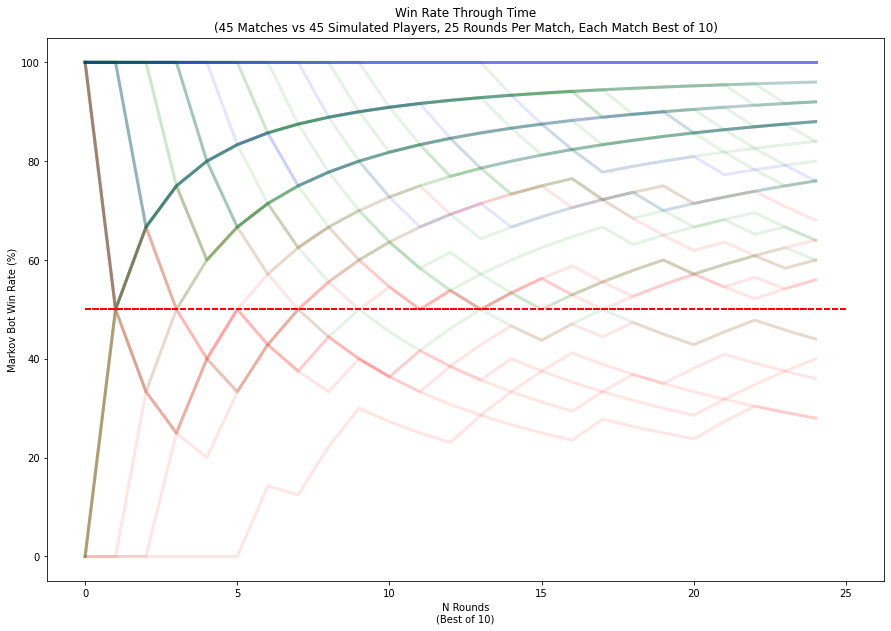

In [7]:
# winrate over time
dir = "game_history/"
saves = [dir + file for file in os.listdir(dir)]

plt.rcParams["figure.figsize"] = (15,10)

for idx, save in enumerate(saves):
    with open(save, "r") as f:
        data = json.load(f)

    ranges = np.ptp(data["ground_truth_matrix"],axis=0)

    # if its a uniform dist i.e. appoximately random, colour the line red
    if np.all(np.isclose(data["ground_truth_matrix"],1/3)):
        colour = "red"
    
    # if the transitions are particularly skewed, colour it blue
    elif np.any(ranges > 0.7):
        colour = "blue"

    # else green
    else:
        colour = "green"
    
    wrs = []
    for i in range(len(data["winner"])):
        timestep = data["winner"][:i+1]
        wrs.append(np.sum(timestep)/len(timestep)*100)

    plt.plot(wrs,alpha=0.1, color=colour, lw=3)
    plt.hlines(y=50, xmin=0, xmax=len(wrs), color="r", linestyles="--")
    plt.xlabel("N Rounds\n(Best of 10)")
    plt.ylabel("Markov Bot Win Rate (%)")
    plt.title(f"Win Rate Through Time\n({len(saves)} Matches vs 45 Simulated Players, 25 Rounds Per Match, Each Match Best of 10)")



Here, red lines represent matches where the opponent draws from a uniform distribution; they are random. As expected, the less uniform the transition matrix of the 'player', the more consistently the decision model wins. Green lines represent matches involving some kind of skew in the transition matrix of the opponent, and blue lines show matches where the opponent had at least one set of state transition probabilities with a range greater than 0.7. For example, given Rock, the probabilities of R,P,S for a particular player were [0.8, 0.15, 0.05]. In these cases, the win rate is higher as the signal to learn from and adapt to is stronger.

Text(0, 0.5, 'Mean Squared Error')

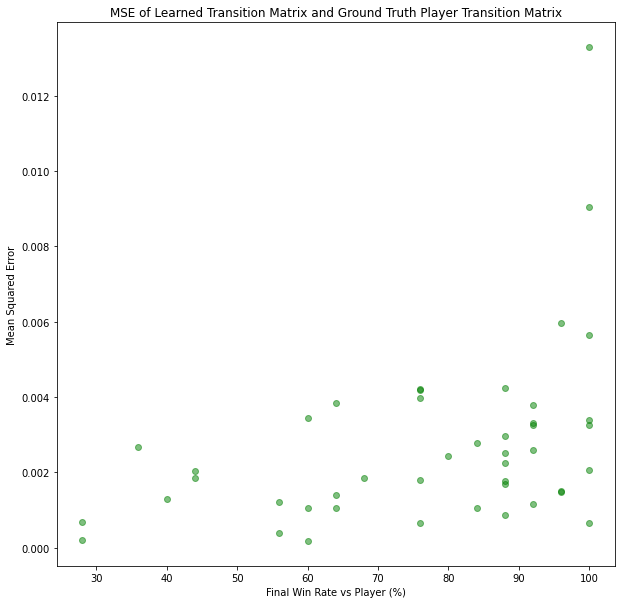

In [8]:
plt.rcParams["figure.figsize"] = (10,10)

all_wrs = []
all_mses = []
for idx, save in enumerate(saves):
    with open(save, "r") as f:
        data = json.load(f)

    gt = np.array(data["ground_truth_matrix"])
    est = np.array(data["estimated_matrix"])

    mse = np.mean(np.square(gt-est))
    wr = np.mean(data["winner"], axis=0)*100

    all_mses.append(mse)
    all_wrs.append(wr)

plt.scatter(all_wrs, all_mses, alpha=0.5, c="green")
plt.title("MSE of Learned Transition Matrix and Ground Truth Player Transition Matrix")
plt.xlabel("Final Win Rate vs Player (%)")
plt.ylabel("Mean Squared Error")

Text(0, 0.5, 'Maximum Range of Transition Probabilities')

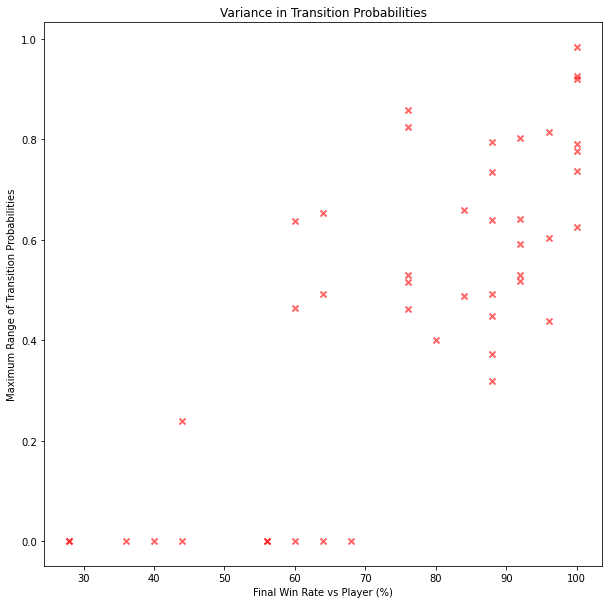

In [9]:
plt.rcParams["figure.figsize"] = (10,10)

ranges = []
for idx, save in enumerate(saves):
    with open(save, "r") as f:
        data = json.load(f)

    gt = np.array(data["ground_truth_matrix"])
    max_range = np.max(np.ptp(gt,axis=0))
    ranges.append(max_range)

plt.scatter(all_wrs, ranges, alpha=0.6, marker="x", c="red", lw=2)
plt.title("Variance in Transition Probabilities")
plt.xlabel("Final Win Rate vs Player (%)")
plt.ylabel("Maximum Range of Transition Probabilities")